In [1]:
<< "MaTeX`"
<< "~/Documents/Wolfram/Maxima_Minima.wls"
<< "~/Documents/Wolfram/Optics_Mie.wls"
<< "~/Documents/Wolfram/Optical_functions/Au_JohnsnChristy.wls"

In [5]:
fs = 9;

texStyle := {FontFamily -> "Latin Modern Roman", FontSize -> fs, Black};
graphsOpts := {Mesh -> Full, BaseStyle -> texStyle, Frame -> True, 
            FrameStyle -> Black, ImageSize -> 215, PlotStyle -> ColorData[3]}
            
SetOptions[ListLinePlot, graphsOpts];

graphsOptsPolar := {Mesh -> Full, BaseStyle -> texStyle,  PolarAxes -> True ,
            FrameStyle -> Black, ImageSize -> 215, PlotStyle -> ColorData[3], Frame -> False, PolarGridLines -> Automatic, Joined -> True}
SetOptions[ListPolarPlot, graphsOptsPolar];

### Vector Spherical Harmonics

In [12]:
CartesianToSpherical = {{Sin[#1]*Cos[#2],Sin[#1]*Sin[#2], Cos[#1]},
                        {Cos[#1]*Cos[#2],Cos[#1]*Sin[#2], -Sin[#1]},
                        {-Sin[#2],Cos[#2], 0}}& ;
SphericalToCartesian = Transpose[CartesianToSpherical[#1,#2]]& ;


MieVectorSphericalHarmonic::PhysicalSolution = "The only radial dependency in the Mie Theory is given by SphericalBesselJ (1) and the SphericalHankelH1 (3)."
MieVectorSphericalHarmonic::CoordinateSystem = "The coordinate system must be either the cartesian or spherical coordinate system."
MieVectorSphericalHarmonic::VectorBase = "The vector base system must be either the cartesian or spherical canonical vector system."
MieVectorSphericalHarmonic::Int = "The parameter `1 must be an integer or a list of int."

The only radial dependency in the Mie Theory is given by SphericalBesselJ (1) and the\
 
>   SphericalHankelH1 (3).
The coordinate system must be either the cartesian or spherical coordinate system.
The vector base system must be either the cartesian or spherical canonical vector\
 
>   system.
The parameter `1 must be an integer or a list of int.

SphericalHankelH1[1, 60 Sqrt[3]]       SphericalHankelH1[1, 60 Sqrt[3]]
{--------------------------------, 0, -(--------------------------------)}
             Sqrt[3]                                Sqrt[3]
    SphericalHankelH1[1, 60 Sqrt[3]]    SphericalHankelH1[1, 60 Sqrt[3]]
{0, --------------------------------, -(--------------------------------)}
                Sqrt[2]                             Sqrt[6]
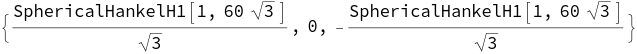
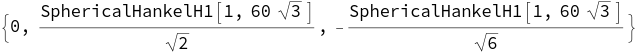

In [18]:
Options[MieVectorSphericalHarmonicMOdd1] = {"InputCoordinateSystem"->"Cartesian", 
                                            "OutputVectorBase" -> "Cartesian"};
                                            
MieVectorSphericalHarmonicMOdd1[super_Integer, nn_ , point_List, wavenumber_, OptionsPattern[]]:= Module[{n, bessel, rho, theta, phi, VectorSphericalHarmonicM, etheta, ephi},
    n = toMap[nn];
    If[ !Apply[And, IntegerQ /@ n], Return[MieVectorSphericalHarmonic::Int,nn]];
    { etheta, ephi} =  Transpose[Drop[IdentityMatrix[3],1]& /@ n]; 
    
    bessel = Switch[super, 
                    1, SphericalBesselJ,
                    3, SphericalHankelH1,
                    _, Return[Message[MieVectorSphericalHarmonic::PhysicalSolution]]];
   
   {rho, theta, phi} = Switch[OptionValue["InputCoordinateSystem"],
                             "Cartesian" , CoordinateTransform[ "Cartesian" -> "Spherical", point],
                             "Spherical", point,
                              _, Return[Message[MieVectorSphericalHarmonic::PhysicalSolution]]];
                              
   VectorSphericalHarmonicM  = Cos[phi] * MiePi[n, Cos[theta] ] * etheta - Sin[phi] * MieTau[n, Cos[theta] ]* ephi;
   VectorSphericalHarmonicM *= bessel[n, wavenumber * rho];

   VectorSphericalHarmonicM = Switch[OptionValue["OutputVectorBase"],
                             "Cartesian" , Map[Dot[SphericalToCartesian[theta, phi], #]&, VectorSphericalHarmonicM],
                             "Spherical", VectorSphericalHarmonicM,
                              _, Message[MieVectorSphericalHarmonic::VectorBase]];
    If[Length[nn] == 0, VectorSphericalHarmonicM[[1]], VectorSphericalHarmonicM ]
]

MieVectorSphericalHarmonicMOdd1[3,1, 60*{1,1,1}, 1]
MieVectorSphericalHarmonicMOdd1[3,1, 60*{1,1,1}, 1, "OutputVectorBase" -> "Spherical"]

SphericalHankelH1[1, 60 Sqrt[3]]   SphericalHankelH1[1, 60 Sqrt[3]]
{0, -(--------------------------------), --------------------------------}
                  Sqrt[3]                            Sqrt[3]
      SphericalHankelH1[1, 60 Sqrt[3]]     SphericalHankelH1[1, 60 Sqrt[3]]
{0, -(--------------------------------), -(--------------------------------)}
                  Sqrt[2]                              Sqrt[6]
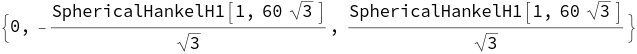
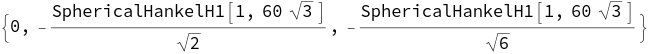

In [23]:
Options[MieVectorSphericalHarmonicMEven1] = {"InputCoordinateSystem"->"Cartesian", 
                                            "OutputVectorBase" -> "Cartesian"};
                                            
MieVectorSphericalHarmonicMEven1[super_Integer, nn_, point_List, wavenumber_, OptionsPattern[]]:= Module[{n, bessel, rho, theta, phi, VectorSphericalHarmonicM, etheta, ephi},
    n = toMap[nn];
    If[ !Apply[And, IntegerQ /@ n], Return[MieVectorSphericalHarmonic::Int,nn]];
    { etheta, ephi} =  Transpose[Drop[IdentityMatrix[3],1]& /@ n]; 
    
    bessel = Switch[super, 
                    1, SphericalBesselJ,
                    3, SphericalHankelH1,
                    _, Return[Message[MieVectorSphericalHarmonic::PhysicalSolution]]];
   
   {rho, theta, phi} = Switch[OptionValue["InputCoordinateSystem"],
                             "Cartesian" , CoordinateTransform[ "Cartesian" -> "Spherical", point],
                             "Spherical", point,
                              _, Return[Message[MieVectorSphericalHarmonic::PhysicalSolution]]];
                              
   VectorSphericalHarmonicM  = -Sin[phi] * MiePi[n, Cos[theta] ] * etheta - Cos[phi] * MieTau[n, Cos[theta] ]* ephi;
   VectorSphericalHarmonicM *= bessel[n, wavenumber * rho];

   VectorSphericalHarmonicM = Switch[OptionValue["OutputVectorBase"],
                             "Cartesian" , Map[Dot[SphericalToCartesian[theta, phi], #]&, VectorSphericalHarmonicM],
                             "Spherical", VectorSphericalHarmonicM,
                              _, Message[MieVectorSphericalHarmonic::VectorBase]];
    If[Length[nn] == 0, VectorSphericalHarmonicM[[1]], VectorSphericalHarmonicM ]
]

MieVectorSphericalHarmonicMEven1[3,1, 60*{1,1,1}, 1]
MieVectorSphericalHarmonicMEven1[3,1, 60*{1,1,1}, 1, "OutputVectorBase" -> "Spherical"]

1   60 Sqrt[3] SphericalHankelH1[0, 60 Sqrt[3]] - SphericalHankelH1[1, 60 Sqrt[3]]
{-(---) ------------------------------------------------------------------------------ + 
   180                                     Sqrt[3]
 
     SphericalHankelH1[1, 60 Sqrt[3]]
>    --------------------------------, 
                90 Sqrt[6]
 
    60 Sqrt[3] SphericalHankelH1[0, 60 Sqrt[3]] - SphericalHankelH1[1, 60 Sqrt[3]]
>   ------------------------------------------------------------------------------ + 
                                      90 Sqrt[3]
 
     SphericalHankelH1[1, 60 Sqrt[3]]
>    --------------------------------, 
                90 Sqrt[6]
 
       1
>   -(---) 
      180
 
       60 Sqrt[3] SphericalHankelH1[0, 60 Sqrt[3]] - SphericalHankelH1[1, 60 Sqrt[3]]
>      ------------------------------------------------------------------------------ + 
                                          Sqrt[3]
 
     SphericalHankelH1[1, 60 Sqrt[3]]
>    --------------------------------}
                90 Sqrt[6]
 SphericalHankelH1[1, 60 Sqrt[3]]
{--------------------------------, 
            90 Sqrt[2]
 
     60 Sqrt[3] SphericalHankelH1[0, 60 Sqrt[3]] - SphericalHankelH1[1, 60 Sqrt[3]]
>    ------------------------------------------------------------------------------, 
                                      180 Sqrt[2]
 
    60 Sqrt[3] SphericalHankelH1[0, 60 Sqrt[3]] - SphericalHankelH1[1, 60 Sqrt[3]]
>   ------------------------------------------------------------------------------}
                                      60 Sqrt[6]
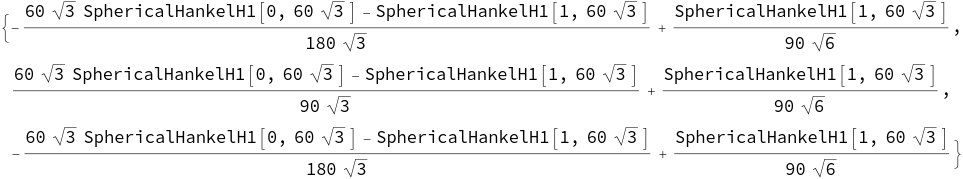
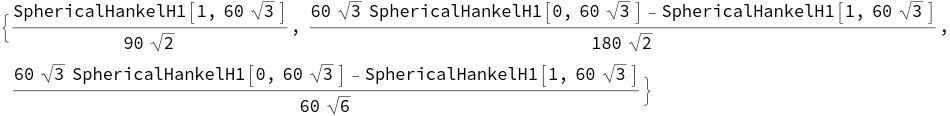

In [28]:
Options[MieVectorSphericalHarmonicNOdd1] = {"InputCoordinateSystem"->"Cartesian", 
                                            "OutputVectorBase" -> "Cartesian"};
                                            
MieVectorSphericalHarmonicNOdd1[super_Integer, nn_, point_List, wavenumber_, OptionsPattern[]]:= Module[{n,bessel, rho, theta, phi, VectorSphericalHarmonicN, er, etheta, ephi},
    n = toMap[nn];
    If[ !Apply[And, IntegerQ /@ n], Return[MieVectorSphericalHarmonic::Int,nn]];
    {er, etheta, ephi} =  Transpose[IdentityMatrix[3]& /@ n]; 
    
    bessel = Switch[super, 
                    1, SphericalBesselJ,
                    3, SphericalHankelH1,
                    _, Return[Message[MieVectorSphericalHarmonic::PhysicalSolution]]];
   
   {rho, theta, phi} = Switch[OptionValue["InputCoordinateSystem"],
                             "Cartesian" , CoordinateTransform[ "Cartesian" -> "Spherical", point],
                             "Spherical", point,
                              _, Return[Message[MieVectorSphericalHarmonic::PhysicalSolution]]];
                              
   VectorSphericalHarmonicN  = Sin[phi] * MieTau[n, Cos[theta] ] * etheta +  Cos[phi] * MiePi[n, Cos[theta] ]* ephi;
   VectorSphericalHarmonicN *= (-n * bessel[n, #] + # * bessel[n-1, #])&[wavenumber * rho] ;
   VectorSphericalHarmonicN += Sin[phi] * bessel[n, wavenumber * rho] *(n*(n + 1)) * LegendreP[n, Cos[theta]] * er;
   VectorSphericalHarmonicN /= wavenumber * rho;


   VectorSphericalHarmonicN = Switch[OptionValue["OutputVectorBase"],
                             "Cartesian" , Map[Dot[SphericalToCartesian[theta, phi], #]&, VectorSphericalHarmonicN],
                             "Spherical", VectorSphericalHarmonicN,
                              _, Message[MieVectorSphericalHarmonic::VectorBase]];
    If[Length[nn] == 0, VectorSphericalHarmonicN[[1]], VectorSphericalHarmonicN ]
    ]

MieVectorSphericalHarmonicNOdd1[3,1, 60*{1,1,1}, 1]
MieVectorSphericalHarmonicNOdd1[3,1, 60*{1,1,1}, 1, "OutputVectorBase" -> "Spherical"]

{{-0.00160762 + 0.00621015 I, 0.000867084 - 0.00308823 I, 0.000867084 - 0.00308823 I}, 
 
>   {-0.00160762 + 0.00621015 I, 0.000867084 - 0.00308823 I, 0.000867084 - 0.00308823 I}}
{{0.0000730617 + 0.0000194448 I, -0.00101029 + 0.00379605 I, 0.00174988 - 0.00657495 I}, 
 
>   {0.0000730617 + 0.0000194448 I, -0.00101029 + 0.00379605 I, 
 
>    0.00174988 - 0.00657495 I}}
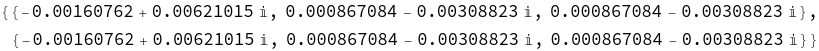
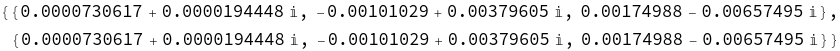

In [33]:
Options[MieVectorSphericalHarmonicNEven1] = {"InputCoordinateSystem"->"Cartesian", 
                                            "OutputVectorBase" -> "Cartesian"};
                                            
MieVectorSphericalHarmonicNEven1[super_Integer, nn_, point_List, wavenumber_, OptionsPattern[]]:= Module[{n,bessel, rho, theta, phi, VectorSphericalHarmonicN, er, etheta, ephi},
    n = toMap[nn];
    If[ !Apply[And, IntegerQ /@ n], Return[MieVectorSphericalHarmonic::Int,nn]];
    {er, etheta, ephi} =  Transpose[IdentityMatrix[3]& /@ n]; 
  
    bessel = Switch[super, 
                    1, SphericalBesselJ,
                    3, SphericalHankelH1,
                    _, Return[Message[MieVectorSphericalHarmonic::PhysicalSolution]]];
   
   {rho, theta, phi} = Switch[OptionValue["InputCoordinateSystem"],
                             "Cartesian" , CoordinateTransform[ "Cartesian" -> "Spherical", point],
                             "Spherical", point,
                              _, Return[Message[MieVectorSphericalHarmonic::PhysicalSolution]]];
                              
   VectorSphericalHarmonicN  = Cos[phi] * MieTau[n, Cos[theta] ] * etheta -  Sin[phi] * MiePi[n, Cos[theta] ]* ephi;
   VectorSphericalHarmonicN *= (-n * bessel[n, #] + # * bessel[n-1, #])&[wavenumber * rho] ;
   VectorSphericalHarmonicN += Cos[phi] * bessel[n, wavenumber * rho] *(n*(n + 1)) * LegendreP[n, Cos[theta]] * er;
   VectorSphericalHarmonicN /= wavenumber * rho;

   VectorSphericalHarmonicN = Switch[OptionValue["OutputVectorBase"],
                             "Cartesian" , Map[Dot[SphericalToCartesian[theta, phi], #]&, VectorSphericalHarmonicN],
                             "Spherical", VectorSphericalHarmonicN,
                              _, Message[MieVectorSphericalHarmonic::VectorBase]];
    If[Length[nn] == 0, VectorSphericalHarmonicN[[1]], VectorSphericalHarmonicN ]
    ]

MieVectorSphericalHarmonicNEven1[3,{1,1}, 60*{1,1,1}, 1.]
MieVectorSphericalHarmonicNEven1[3,{1,1}, 60*{1,1,1}, 1., "OutputVectorBase" -> "Spherical"]

### Field

In [38]:
Options[MieScatteredElectricField] = {"InputCoordinateSystem"->"Cartesian", 
                                            "OutputVectorBase" -> "Cartesian"};

MieScatteredField::Inside = "The radius `1` must be smaller than the distnace to the evaluation point `2`"
MieScatteredElectricField[point_,indices_, wlength_, radius_,  OptionsPattern[]]:=Module[{x, poles, coeff, Nen1, Mon1, field},
    Switch[OptionValue["InputCoordinateSystem"],
            "Cartesian", If[Norm[point] < radius, Return[Message[MieScatteredField::Inside,radius,Norm[point] ] ]],
            "Spherical", If[ point[[1]] < radius, Return[Message[MieScatteredField::Inside,radius,point[[1]]  ] ]]
            ];
    
    x = (2.*Pi*radius)*indices[[1]]/wlength;    (*Size parameter*)
    poles = Range[Ceiling[x + 4.*x^(1./3) + 2.]];(*Wacombe criteria for convergence*)
    
    coeff = Map[ I^#*(2*#+1)/(#*(#+1)) &, poles];
    Nen1 = MieVectorSphericalHarmonicNEven1[3, poles, point, 2.* Pi * indices[[1]]/wlength, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"] ,"OutputVectorBase" -> OptionValue["OutputVectorBase"] ];
    Mon1 = MieVectorSphericalHarmonicMOdd1[3,  poles, point, 2.* Pi * indices[[1]]/wlength, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"] ,"OutputVectorBase" -> OptionValue["OutputVectorBase"] ];
    
    field = {I, -1} * {Nen1, Mon1} * MieCoefficient[poles, x, Divide @@ Reverse[indices]];
    field = coeff * Plus @@@ Transpose[field];
    Plus @@ field
]

The radius `1` must be smaller than the distnace to the evaluation point `2`

In [41]:
 MieScatteredElectricField[{1,0,0}, {1, 1.5}, 500, .25] 

-18             -6                         -17             -6
{7.12479 10    - 1.02268 10   I, 0. + 0. I, 3.20528 10    - 2.04539 10   I}

In [42]:
Options[MieInternalElectricField] = {"InputCoordinateSystem"->"Cartesian", 
                                            "OutputVectorBase" -> "Cartesian"};
 MieInternalField::Outside = "The radius `1` must be larger than the distnace to the evaluation point `2`"
MieInternalElectricField[point_,indices_, wlength_, radius_,  OptionsPattern[]]:=Module[{x, poles, coeff, Nen1, Mon1, field},
    Switch[OptionValue["InputCoordinateSystem"],
            "Cartesian", If[Norm[point] > radius, Return[Message[MieInternalField::Outside,radius,Norm[point] ] ]],
            "Spherical", If[ point[[1]] > radius, Return[Message[MieInternalField::Outside,radius,point[[1]]  ] ]]
            ];
    
    x = (2.*Pi*radius)*indices[[1]]/wlength;    (*Size parameter*)
    poles = Range[Ceiling[x + 4.*x^(1./3) + 2.]];(*Wacombe criteria for convergence*)
    
    coeff = Map[ I^#*(2*#+1)/(#*(#+1)) &, poles];

    Nen1 = MieVectorSphericalHarmonicNEven1[1, poles, point, 2.* Pi * indices[[2]]/wlength, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"] ,"OutputVectorBase" -> OptionValue["OutputVectorBase"] ];
    Mon1 = MieVectorSphericalHarmonicMOdd1[1,  poles, point, 2.* Pi * indices[[2]]/wlength, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"] ,"OutputVectorBase" -> OptionValue["OutputVectorBase"] ];

    field = {1, -I} * { Mon1, Nen1} * MieCoefficientInt[poles, x, Divide @@ Reverse[indices]];
    field = coeff * Plus @@@ Transpose[field];
    Plus @@ field
]

The radius `1` must be larger than the distnace to the evaluation point `2`

In [ ]:
grid = Table[{x,.0001,z},{x,-1,1,.05},{z,-1,1,.05}];
AbsoluteTiming[data = Map[
    If[Norm[#] < .75,
        Norm@MieInternalElectricField[#,{1., 1.5}, 500, .75],
        Norm@MieScatteredElectricField[#,{1., 1.5}, 500, .75]]&, grid, {2}];]

In [ ]:
ListDensityPlot[data]